<a href="https://colab.research.google.com/github/divyanshu905/hello-world/blob/main/Possum_age_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
raw_df = pd.read_csv('possum.csv')
raw_df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
raw_df['Pop'].value_counts()

other    58
Vic      46
Name: Pop, dtype: int64

In [ ]:
raw_df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [ ]:
df = raw_df[['Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pop       104 non-null    object 
 1   sex       104 non-null    object 
 2   age       102 non-null    float64
 3   hdlngth   104 non-null    float64
 4   skullw    104 non-null    float64
 5   totlngth  104 non-null    float64
 6   taill     104 non-null    float64
 7   footlgth  103 non-null    float64
 8   earconch  104 non-null    float64
 9   eye       104 non-null    float64
 10  chest     104 non-null    float64
 11  belly     104 non-null    float64
dtypes: float64(10), object(2)
memory usage: 9.9+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89196e19d0>,
      dtype=object)

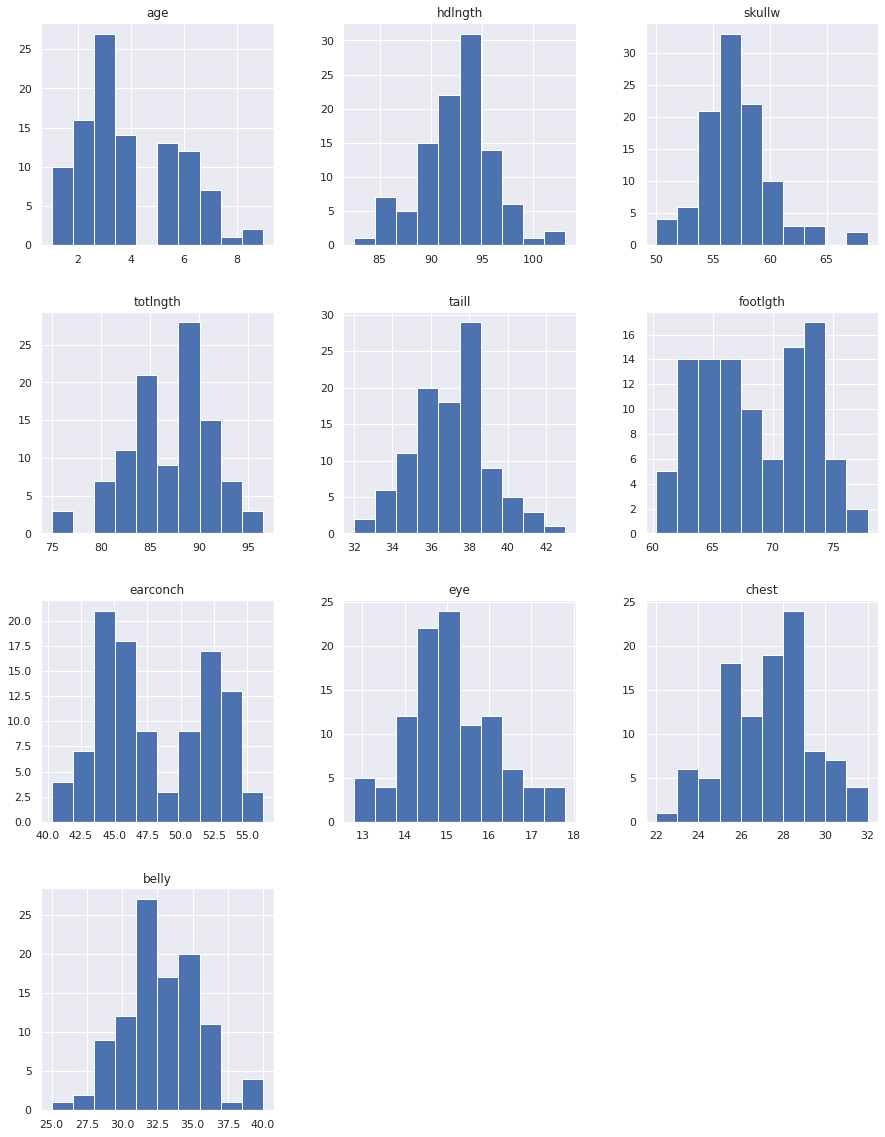

In [ ]:
df.hist(figsize=(15,20))

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
train_df.shape[0]/raw_df.shape[0]

0.7980769230769231

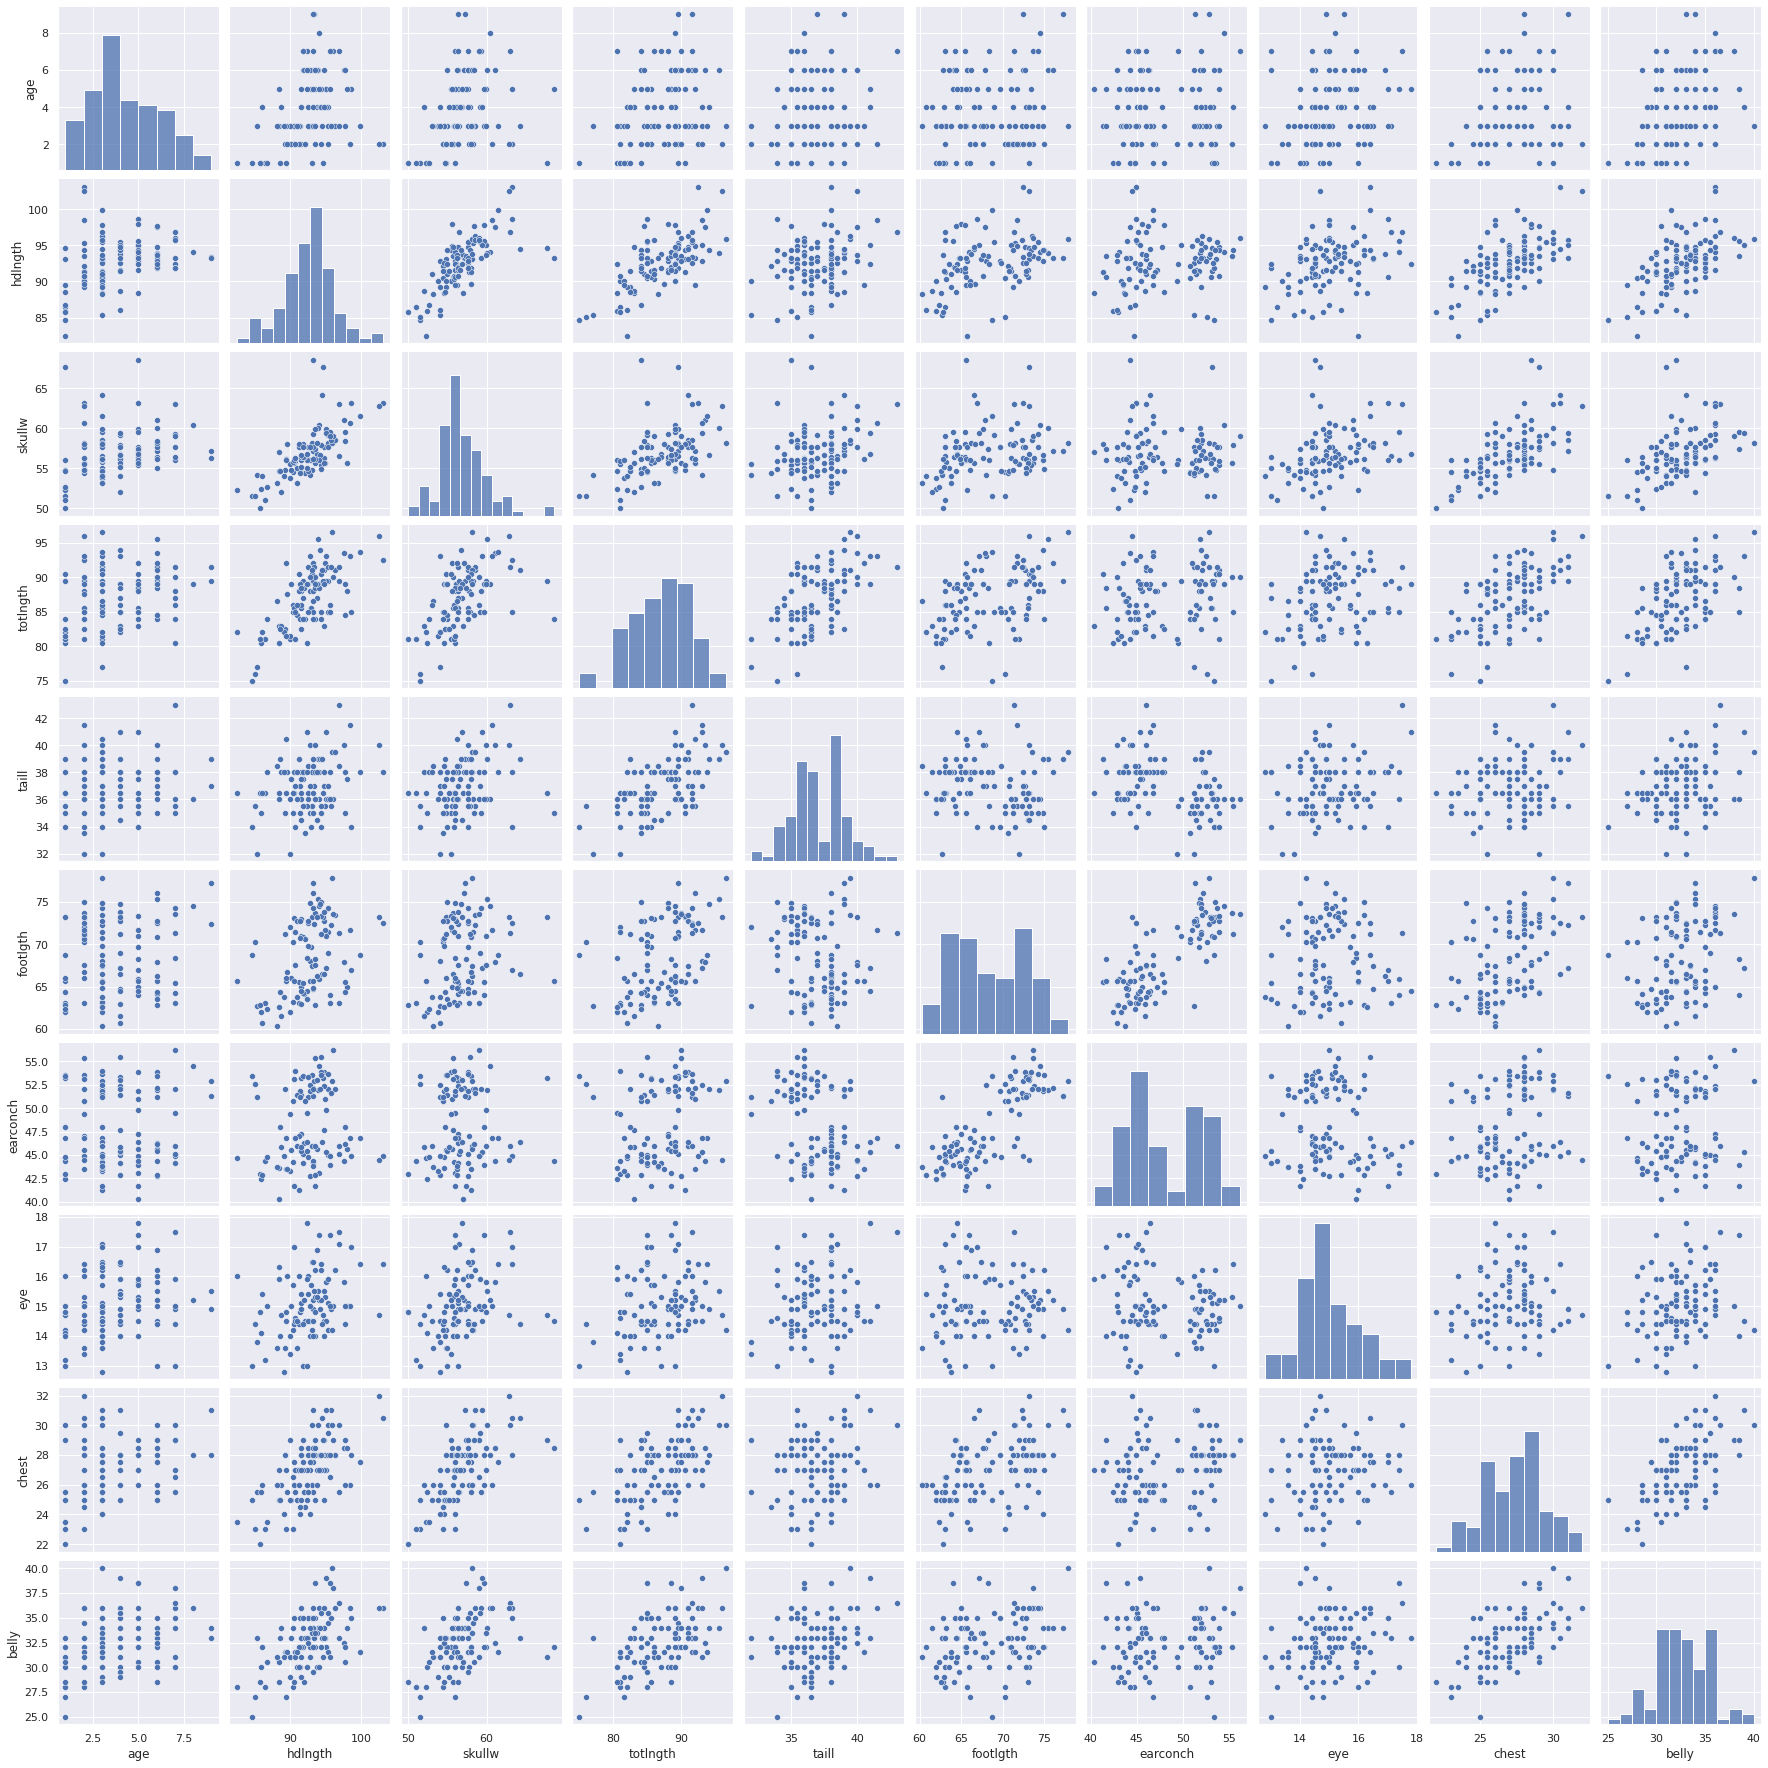

In [ ]:
sns.pairplot(df)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 55 to 102
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pop       83 non-null     object 
 1   sex       83 non-null     object 
 2   age       82 non-null     float64
 3   hdlngth   83 non-null     float64
 4   skullw    83 non-null     float64
 5   totlngth  83 non-null     float64
 6   taill     83 non-null     float64
 7   footlgth  82 non-null     float64
 8   earconch  83 non-null     float64
 9   eye       83 non-null     float64
 10  chest     83 non-null     float64
 11  belly     83 non-null     float64
dtypes: float64(10), object(2)
memory usage: 8.4+ KB


In [ ]:
y_train = train_df['sex']
X_train = train_df[['Pop', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]
X_train
y_train.unique()

array(['m', 'f'], dtype=object)

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_train = pd.DataFrame(y_train, columns=['sex'])
y_train['sex'].unique()

array([1, 0])

In [ ]:
X_train['Pop'].value_counts()

other    47
Vic      36
Name: Pop, dtype: int64

In [ ]:
num_col = train_df[['age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]
cat_col = train_df[['Pop']]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_transformation = Pipeline([
                               ('imputer', SimpleImputer(strategy='median')),
                               ('scaler', StandardScaler())
])

df_num_transformation = pd.DataFrame(num_transformation.fit_transform(num_col))

In [ ]:
df_num_transformation

,0,1,2,3,4,5,6,7,8,9
0,-0.394810,1.985627,1.458659,1.461520,0.491589,0.095478,-0.313541,1.286653,0.273625,-0.350993
1,0.160601,-0.001294,-0.244757,0.417118,-0.534874,1.027796,1.274772,0.321954,0.520483,0.931565
2,1.271422,0.294059,-0.213212,-0.693948,-0.534874,-1.246149,-1.266529,1.093713,-0.960663,0.931565
3,-0.394810,-0.484599,-0.307846,-1.360587,-1.561336,0.732183,1.445822,-0.449805,0.026768,-0.350993
4,-1.505632,-2.686323,-1.443457,-1.138374,-0.278258,-0.586705,-0.826688,0.900773,-1.701236,-1.633550
...,...,...,...,...,...,...,...,...,...,...
78,-1.505632,-1.773413,-1.411912,-1.471694,-1.048105,-1.428065,-1.388707,-0.932155,-0.713805,-0.900660
79,0.716011,0.106107,0.228414,-0.360628,-1.561336,0.322873,0.908239,0.611363,0.520483,0.931565
80,-0.394810,-0.887353,-0.907196,-1.138374,0.491589,-1.018755,-0.777817,-2.186264,-1.454378,-0.534215
81,1.271422,1.368071,1.300935,1.417078,1.518052,-0.086437,-0.924431,0.707833,0.767341,0.015453


In [ ]:
df_num_transformation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       83 non-null     float64
 1   1       83 non-null     float64
 2   2       83 non-null     float64
 3   3       83 non-null     float64
 4   4       83 non-null     float64
 5   5       83 non-null     float64
 6   6       83 non-null     float64
 7   7       83 non-null     float64
 8   8       83 non-null     float64
 9   9       83 non-null     float64
dtypes: float64(10)
memory usage: 6.6 KB


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(num_col)
cat_attribs = list(cat_col)

full_pipeline = ColumnTransformer([
                                   ('num', num_transformation, num_attribs),
                                   ('cat', OneHotEncoder(), cat_attribs)
])

X = full_pipeline.fit_transform(X_train)

In [ ]:
X = pd.DataFrame(X, columns=['age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly', 'Pop1', 'pop2'])

In [ ]:
X

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop1,pop2
0,-0.394810,1.985627,1.458659,1.461520,0.491589,0.095478,-0.313541,1.286653,0.273625,-0.350993,0.0,1.0
1,0.160601,-0.001294,-0.244757,0.417118,-0.534874,1.027796,1.274772,0.321954,0.520483,0.931565,1.0,0.0
2,1.271422,0.294059,-0.213212,-0.693948,-0.534874,-1.246149,-1.266529,1.093713,-0.960663,0.931565,0.0,1.0
3,-0.394810,-0.484599,-0.307846,-1.360587,-1.561336,0.732183,1.445822,-0.449805,0.026768,-0.350993,1.0,0.0
4,-1.505632,-2.686323,-1.443457,-1.138374,-0.278258,-0.586705,-0.826688,0.900773,-1.701236,-1.633550,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
78,-1.505632,-1.773413,-1.411912,-1.471694,-1.048105,-1.428065,-1.388707,-0.932155,-0.713805,-0.900660,0.0,1.0
79,0.716011,0.106107,0.228414,-0.360628,-1.561336,0.322873,0.908239,0.611363,0.520483,0.931565,1.0,0.0
80,-0.394810,-0.887353,-0.907196,-1.138374,0.491589,-1.018755,-0.777817,-2.186264,-1.454378,-0.534215,0.0,1.0
81,1.271422,1.368071,1.300935,1.417078,1.518052,-0.086437,-0.924431,0.707833,0.767341,0.015453,0.0,1.0


In [ ]:
from sklearn.linear_model import  LogisticRegression

model = LogisticRegression()
model.fit(X, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(model, X, y_train, cv=3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[16, 19],
       [14, 34]])

In [ ]:
train_df['sex'].value_counts()

m    48
f    35
Name: sex, dtype: int64

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred)

0.6415094339622641

In [ ]:
recall_score(y_train, y_train_pred)

0.7083333333333334

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.6732673267326733

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_train_pred)

0.5827380952380953

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'C':[1.0, 10.0, 100.0], 'max_iter':[10, 100, 1000], 'penalty':['l1', 'l2'], 'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']}
]


grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1.0, 10.0, 100.0], 'max_iter': [10, 100, 1000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

In [ ]:
best_param = grid_search.best_params_
best_param

{'C': 1.0, 'max_iter': 10, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
model1 = LogisticRegression(C=1.0, max_iter=10, penalty='l1', solver='saga')
model1.fit(X, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_pred1 = cross_val_predict(model1, X, y_train, cv=3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validat

In [ ]:
precision_score(y_train, y_train_pred1)

0.6

In [ ]:
recall_score(y_train, y_train_pred1)

0.6875

In [ ]:
f1_score(y_train, y_train_pred1)

0.6407766990291262

In [ ]:
roc_auc_score(y_train, y_train_pred1)

0.5294642857142857

In [ ]:
y_test = test_df['sex']
X_test = test_df[['Pop', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]

In [ ]:
X_test_tr = full_pipeline.transform(X_test)

In [ ]:
X_test_tr = pd.DataFrame(X_test_tr, columns=['age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly', 'Pop1', 'pop2'])
X_test_tr

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop1,pop2
0,-0.394810,0.079257,-0.875651,1.305971,-0.021642,-0.063698,1.079288,-0.546275,0.026768,-0.534215,1.0,0.0
1,-0.394810,-0.565150,-0.339391,-0.249521,-0.278258,-1.155191,-0.948866,0.611363,-0.220090,0.565120,0.0,1.0
2,0.716011,0.267209,0.165325,0.306012,0.491589,-0.018219,-1.559756,-1.028625,1.014198,2.214123,0.0,1.0
3,1.826833,1.180119,1.931830,0.972651,3.057746,0.686704,-0.509026,2.347822,1.507914,1.481233,0.0,1.0
4,-0.394810,-0.296647,-0.781017,-0.693948,-1.048105,1.027796,0.761625,-0.642745,-1.207521,0.931565,1.0,0.0
5,1.826833,-0.189246,0.228414,-0.693948,-0.791489,-0.927797,-0.728946,-0.642745,1.014198,0.931565,0.0,1.0
6,-0.950221,-0.484599,-0.181667,-0.471735,-0.021642,-0.154656,-0.313541,-0.546275,-0.713805,-0.534215,0.0,1.0
7,0.716011,1.636574,1.994920,-0.471735,-1.561336,-0.313832,-0.777817,1.865472,0.520483,0.931565,0.0,1.0
8,2.937654,0.213508,0.102235,0.528225,1.004820,2.028331,0.786061,-0.160396,2.001629,0.565120,1.0,0.0
9,2.382244,0.428311,1.111667,0.417118,-0.534874,1.414366,1.567999,0.129014,0.520483,1.298010,1.0,0.0


In [ ]:
y_test_pred = model.predict(X_test_tr)

In [ ]:
y_test = label_encoder.fit_transform(y_test)
y_test = pd.DataFrame(y_test, columns=['sex'])
y_test['sex'].unique()

array([1, 0])

In [ ]:
f1_score(y_test, y_test_pred)

0.7407407407407408

In [ ]:
roc_auc_score(y_test, y_test_pred)

0.6346153846153846